In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd


from rBoltzMach import boltzmanmachine
from metrics import pair_error, sequence_error, JS_divergence
plt.rcParams['font.size'] = 14

## Data selection

In [2]:
CASE=1           #select the data to be analysed
if CASE==0: dname="DATA"
if CASE==1: dname="DATA_b"
    
fname=dname+'/x_RBM_q0.1.dat'
v = np.loadtxt(fname, delimiter=" ",dtype=int)
v0 = np.copy(v)  #Copy original data to analyse later

In [3]:
perror = pair_error(v0, spin=False)
serror = sequence_error(v0, spin=False, vmin=0)
print(perror, serror)


9.457500000000001 22.6


## Network parameters

In [4]:
N = len(v)       #Number of rows
L = len(v[0])    #Set the number of visible variable
M = 6            #Set the number of hidden units

sigma = np.sqrt(4. / float(L + M))

print(f'each of N={N} data has L={L} digits')
print(f'The network has {L} visible units and {M} hidden units')
print(f'Initializing std {sigma}')

each of N=10000 data has L=20 digits
The network has 20 visible units and 6 hidden units
Initializing std 0.3922322702763681


## Defining training parameters

In [5]:
seed = 1      #set the random seed in order to reproduce results 
Amp_training  = 0.05      #set the coefficient that multiply the temp, Higher Amp -> Lower Temp
cdn  = 1        #set the number of phases


n_epochs = 100   #set the number of epochs


spin = True      #chose the kind of representation

if spin:
    GAP=2        #sigmoid takes into account energy difference =2
    v = 2*v - 1  #convert 0,1 -> -1,1
    vmin=-1
else:
    GAP=1
    vmin=0

## Initialize the Restricted Boltzmann Machine

In [6]:
np.random.seed(seed)
rbm = boltzmanmachine(L,M,sigma)

## Model Training

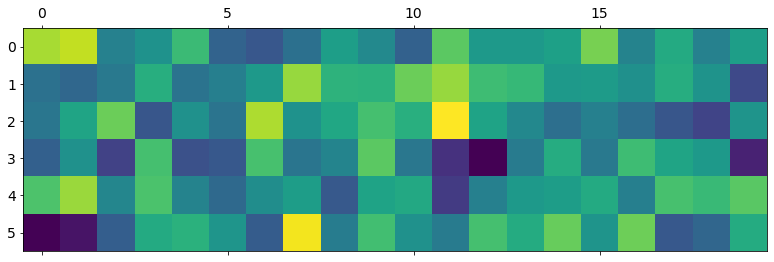

10


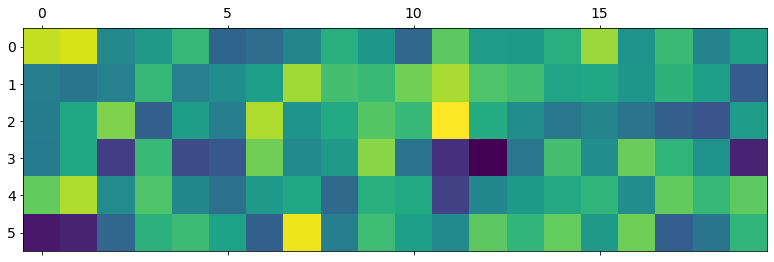

20


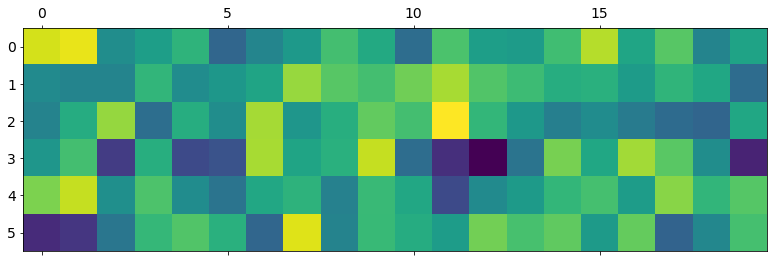

30


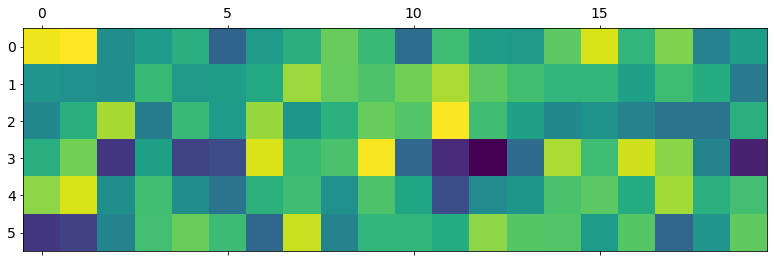

40


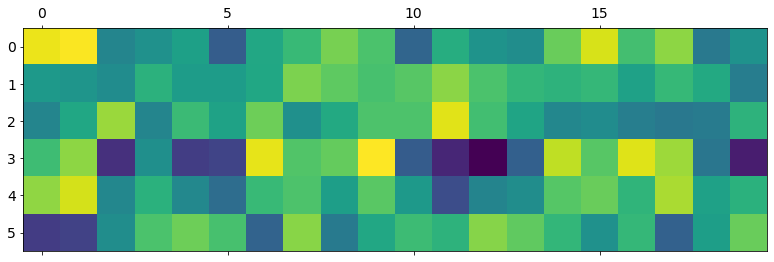

50


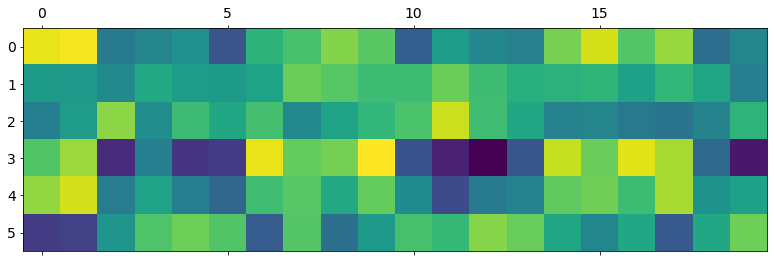

60


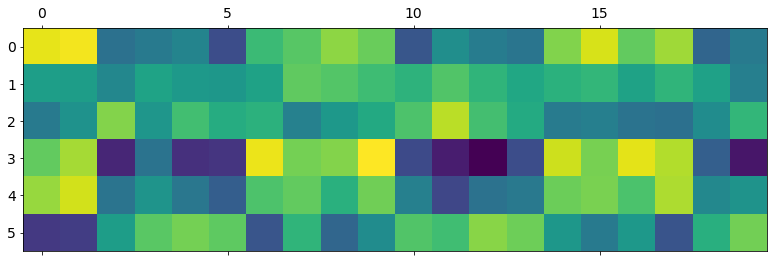

70


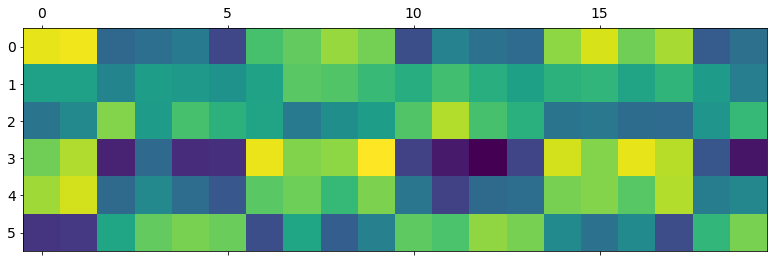

80


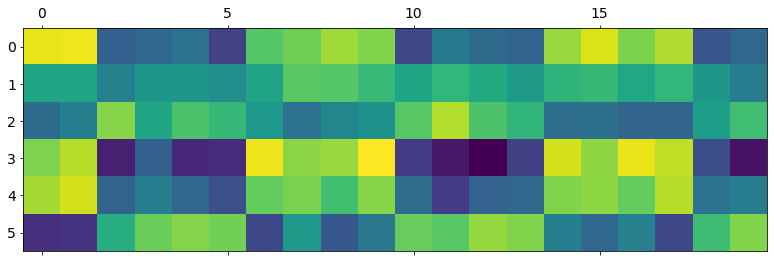

90


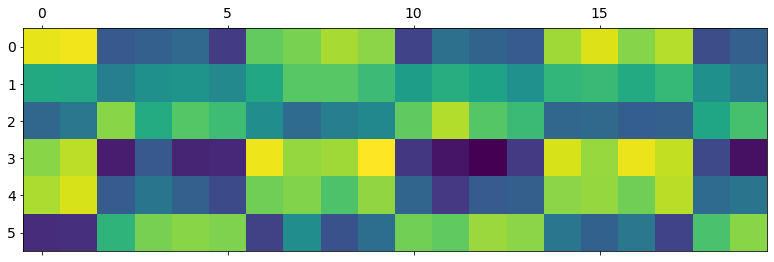

100


In [7]:
# random seed for reproducibility
np.random.seed(seed)

# learning rate
l_rate = 1e-3

# minibatch
mini, m = 500, 0

# train model
print('===================================================')
for epoch in range(n_epochs):
    # aggregate normalization of batch statistics and learning rate
    for k in range(N):
        
        if m==0:
            rbm.init_avg()

        vf = np.copy(v[k])
        
        for i in np.arange(cdn):
            h = rbm.positive(vf, Amp_training)
            vf = rbm.negative(h, Amp_training)
            
        hf = rbm.positive(vf, Amp_training)

        rbm.update_vh(v[k], vf, h, hf, mini)
        
    
        m += 1
        # minibatch
        if m==mini:
            
            #rbm.ADAM(l_rate, epoch+1)
            #rbm.SGD(l_rate_m)
            rbm.RMSprop(l_rate)
            m=0
    
    # randomize the order of input data
    np.random.shuffle(v)
    if epoch%10==9:
        plt.matshow(rbm.w.T)
        plt.show()
        print(epoch+1)

## Save model into .npy file
### a bias 1x20
### b bias 1x20 
### w bias 6x20

## Generating fantasy data in order to test the model

In [8]:
Amp_fantasy = 0.5

vf = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = rbm.positive(v0[k],Amp_fantasy)
    # negative CD phase: generating fantasy vf with low T == large GAP
    vf[k] = rbm.negative(h,Amp_fantasy)



In [21]:


p = p(vf)
q = np.ones((5,4))*0.25

In [24]:
p = np.reshape(p, (5,4))
print(p)
print(q)

[[0.2028 0.3066 0.4465 0.0441]
 [0.482  0.0138 0.0801 0.4241]
 [0.4878 0.0195 0.0524 0.4403]
 [0.485  0.0091 0.0208 0.4851]
 [0.0069 0.501  0.0201 0.472 ]]
[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


In [28]:
JS_divergence(p,q)

0.6353926001228403

## Evaluating Pair-wise errors, Sequence error, Jensen-Shannon Divergence

In [ ]:
print(v0.shape)

In [ ]:
perror = pair_error(v0, spin=False)
serror = sequence_error(v0, spin=False, vmin=vmin)
print(perror, serror)


In [ ]:
v = ((vf-vmin)/(1-vmin))
v = np.sum(v, axis=0)
print(np.reshape((v/100), (5, 4)).sum(axis=0))

In [ ]:
v_data = np.sum(v0, axis=0)
print(v_data/100)